In [2]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [4]:
df_laptops = pd.read_csv('202320_Laboratorio 2 - Regresión_data_laptop_data_train.csv', sep=',', encoding = 'utf-8', index_col=0)

In [5]:
df_laptops.shape

(1216, 13)

In [6]:
df_laptops.sample(5)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
id,,,,,,,,,,,,,
101,HP,Notebook,4,2.10,9.830633,0,0,141.211998,AMD Processor,500.0,0,AMD,Windows
536,Dell,Notebook,8,2.20,10.656930,0,0,141.211998,Intel Core i5,0.0,256,AMD,Windows
333,Lenovo,Notebook,4,1.85,10.082584,0,0,141.211998,Intel Core i3,1000.0,0,Intel,Windows
198,HP,Gaming,16,3.35,11.204675,0,1,127.335675,Intel Core i7,1000.0,256,Nvidia,Windows
1112,Lenovo,Notebook,4,2.10,10.037018,0,0,100.454670,Intel Core i3,0.0,128,Intel,Windows


In [7]:
df_laptop_new = pd.read_csv('202320_Laboratorio 2 - Regresión_data_laptop_data_test_unlabeled.csv')

In [8]:
df_laptop_new.shape

(64, 14)

In [9]:
df_laptop_new.sample(5)

,id,Company,TypeName,Ram,Weight,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os,CalculatedPrice
46,293,Dell,Notebook,8,2.00,0,0,141.211998,Intel Core i7,0.0,256,Nvidia,Windows,NaN
28,195,HP,Notebook,8,2.50,0,1,127.335675,Intel Core i5,1000.0,0,Nvidia,Windows,NaN
60,750,Lenovo,Netbook,4,1.40,1,0,135.094211,Other Intel Processor,0.0,128,Intel,Windows,NaN
20,1035,HP,Ultrabook,8,1.26,0,0,176.232574,Intel Core i7,0.0,256,Intel,Windows,NaN
57,978,HP,Notebook,6,2.04,0,0,100.454670,Intel Core i7,1000.0,0,Intel,Windows,NaN


In [14]:
features = ['Company','TypeName','Ram','Weight','TouchScreen','Ips','Ppi','Cpu_brand','HDD','SSD','Gpu_brand','Os']

In [15]:
df_laptops[['Price']+features].isnull().sum() / df_laptops.shape[0]

Price          0.012336
Company        0.000000
TypeName       0.000000
Ram            0.000000
Weight         0.018914
TouchScreen    0.000000
Ips            0.000000
Ppi            0.009868
Cpu_brand      0.000000
HDD            0.013158
SSD            0.000000
Gpu_brand      0.000000
Os             0.000000
dtype: float64

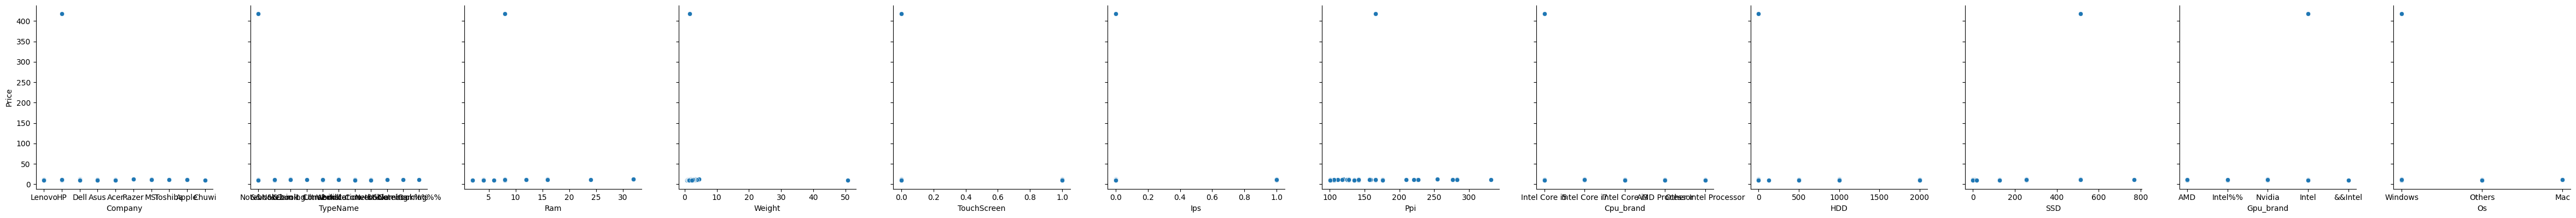

In [20]:
sns.pairplot(df_laptops.sample(frac=0.2), height=4, y_vars=['Price'], x_vars=features, kind='scatter')

C:\Users\juanc\AppData\Local\Temp\ipykernel_7308\2967388794.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_laptops[features].corr(), cmap='Blues', vmin=0, vmax=1)


<AxesSubplot: >

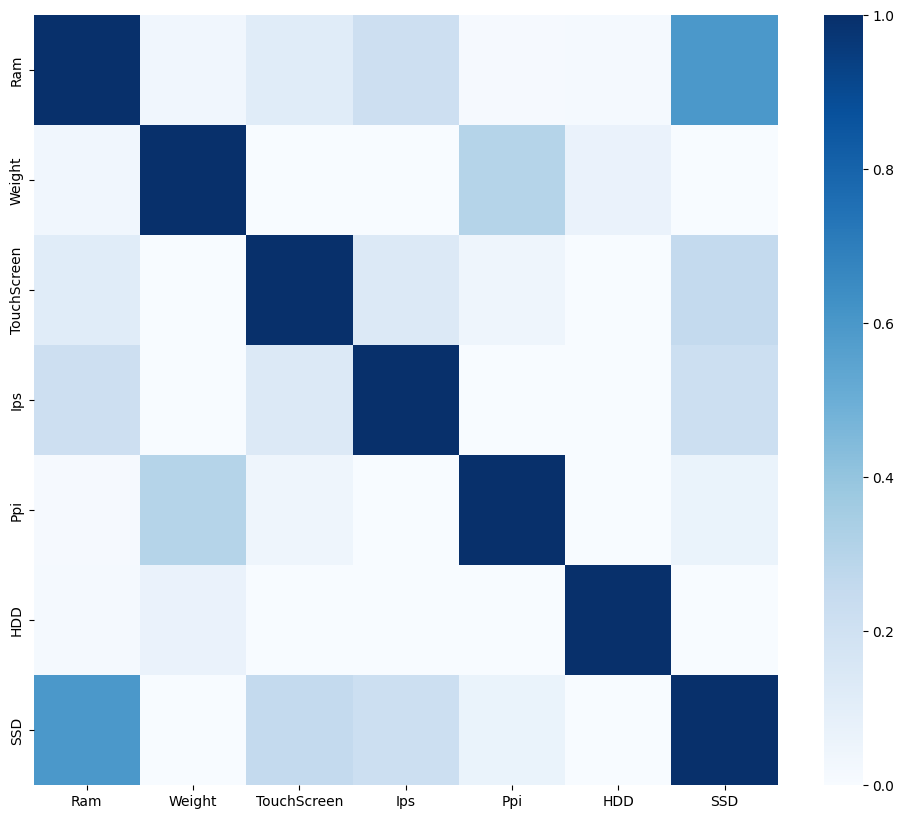

In [21]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_laptops[features].corr(), cmap='Blues', vmin=0, vmax=1)